<a href="https://colab.research.google.com/github/JaquelineEspinoza/EDP2/blob/main/M%C3%A9todo%20de%20Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Método de Colocación**

Consoiderar un problema de valor inicial $u''+u=x$ con condiciones $u(0)=0$ y $u'(0)=2$

In [28]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x = sp.symbols('x') #Introducimos variable
u = sp.Function('u') #Introducimos función

In [30]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [31]:
sol = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})

In [32]:
sol

Eq(u(x), x + sin(x))

In [26]:
#Convertir en un arreglo
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

xx = np.linspace(0, 1, 100)
yy = u_num(xx)

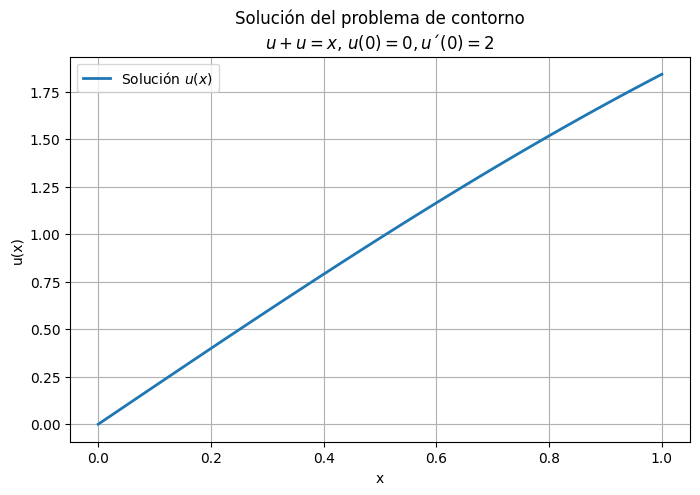

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n$u'' + u = x$, $u(0)=0, u´(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

In [73]:
#aproximación lineal
a, b, c, d = sp.symbols('a b c d')
a = 0
b = 2
#Función de prueba u_n(x) que cumple u(0)=0, u'(0)=2
u_n = a + b*x + c*x**2 + d*x**3

In [74]:
u_n

c*x**2 + d*x**3 + 2*x

In [75]:
u_n_2 = sp.diff(u_n, x, 2)

F = u_n_2 + u_n - x

In [76]:
#Puntos de colocación
points = [sp.Rational(1,2), sp.Rational(1,1)]

In [77]:
points

[1/2, 1]

In [78]:
eqs = [sp.Eq(F.subs(x, p), 0) for p in points]

#Resolviendo para c y d
sol_1 = sp.solve(eqs, [c, d])

In [79]:
for eq in eqs:
  print(eq)

Eq(9*c/4 + 25*d/8 + 1/2, 0)
Eq(3*c + 7*d + 1, 0)


In [80]:
print("Sistema de ecuaciones simbólico: ")
for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbólico: 
9⋅c   25⋅d   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅c + 7⋅d + 1 = 0


In [81]:
sol_1

{c: -1/17, d: -2/17}

In [82]:
#Sustituir en la función de prueba
u_approx = u_n.subs(sol_1)

In [83]:
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [84]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

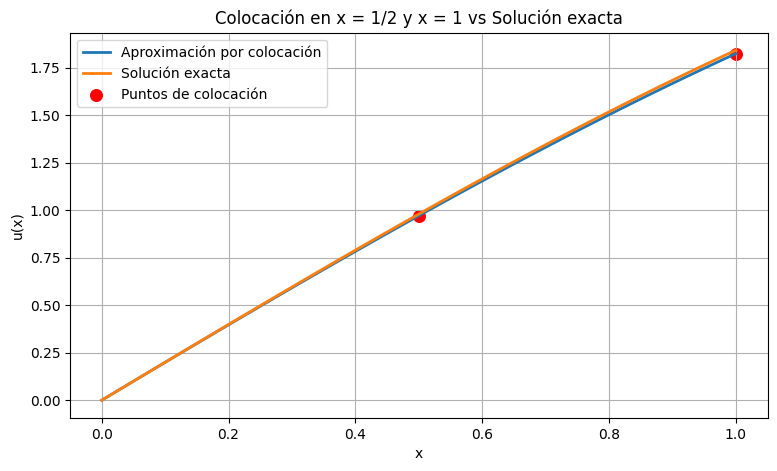

In [85]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)

#puntos de colocación
plt.scatter([0.5, 1], u_approx_fn(np.array([0.5, 1])), color="red", s=70, label="Puntos de colocación")
plt.title("Colocación en x = 1/2 y x = 1 vs Solución exacta")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

In [72]:
#Calculamos el error
error = np.abs(yy - u_approx_fn(xx))
error_max = np.max(error)
print("Error máximo: ", error_max)

Error máximo:  0.841470984807897
